<font size="6">**Project definition**

<font size="4">This projects takes the steps to fit and evaluate a Convolutional Neural Network (CNN) in an image classification problem. </font>

In [1]:
import numpy as np
import random
from tensorflow import keras
import matplotlib.pyplot as plt

<font size="5">**Load dataset**

In [3]:
X_train = np.loadtxt('./CNN/input.csv', delimiter = ',')
X_test = np.loadtxt('./CNN/input_test.csv', delimiter = ',')
y_train = np.loadtxt('./CNN/labels.csv', delimiter = ',')
y_test = np.loadtxt('./CNN/labels_test.csv', delimiter = ',')

X_train = X_train.reshape(len(X_train), 100,100,3) # create 100x100 images with 3 bands (RGB) from each input instance 
X_test = X_test.reshape(len(X_test), 100,100,3)
y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)

In [6]:
X_train.shape , y_train.shape, X_test.shape, y_test.shape

((2000, 100, 100, 3), (2000, 1), (400, 100, 100, 3), (400, 1))

In [8]:
X_train[1,]

array([[[131., 128., 135.],
        [160., 157., 164.],
        [198., 192., 204.],
        ...,
        [250., 249., 247.],
        [255., 255., 253.],
        [250., 249., 245.]],

       [[140., 137., 144.],
        [127., 124., 131.],
        [120., 114., 124.],
        ...,
        [251., 253., 252.],
        [254., 255., 253.],
        [254., 255., 251.]],

       [[204., 202., 207.],
        [187., 185., 190.],
        [147., 142., 148.],
        ...,
        [249., 255., 255.],
        [238., 247., 242.],
        [232., 241., 236.]],

       ...,

       [[174., 182., 195.],
        [172., 180., 193.],
        [178., 186., 197.],
        ...,
        [ 87., 114.,  97.],
        [ 75.,  99.,  83.],
        [ 80., 105.,  86.]],

       [[166., 173., 189.],
        [164., 172., 185.],
        [172., 180., 193.],
        ...,
        [ 78., 106.,  84.],
        [ 72.,  97.,  76.],
        [ 77., 102.,  81.]],

       [[173., 180., 196.],
        [172., 179., 195.],
        [174., 1

<font size="5">**Data scaling**</font>

In [11]:
X_train = X_train/255
X_test = X_test/255

<font size="5">**Display a random image**</font>

This is an image of a dog


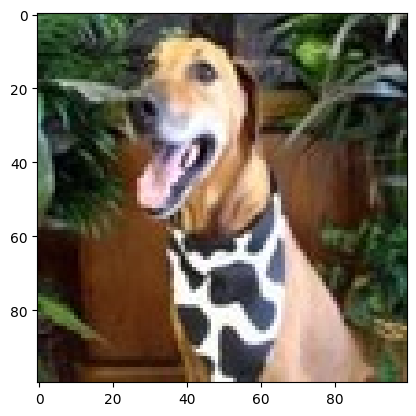

In [14]:
index = random.randint(0,len(X_train))
plt.imshow(X_train[index,])
label = 'dog' if y_train[index]==0 else 'cat'
print(f'This is an image of a {label}')

<font size="5">**Defining a CNN model**

In [121]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = X_train[1,:].shape, padding = 'SAME'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(32, (3,3), activation = 'relu', padding = 'SAME'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(30, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')])

In [123]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 100, 100, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 50, 50, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 50, 50, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 25, 25, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 20000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 30)                  │         600,030 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 610,205 (2.33 MB)

 Trainable params: 610,205 (2.33 MB)

 Non-trainable params: 0 (0.00 B)

In [125]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

<font size="5">**Train the model**

<font size="4">In this section, the model is trained and the model performance through epochs is plotted.</font>

In [128]:
train_model = model.fit(X_train, y_train, epochs = 10, batch_size = 50)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.5033 - loss: 0.7402
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.5856 - loss: 0.6785
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.6739 - loss: 0.6145
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.7298 - loss: 0.5397
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.7604 - loss: 0.5203
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.8189 - loss: 0.4262
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.8526 - loss: 0.3490
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.8848 - loss: 0.2921
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.9135 - loss: 0.2194
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.9339 - loss: 0.1875


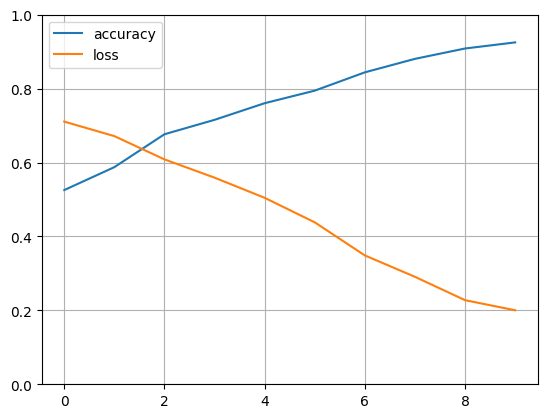

In [130]:
import pandas as pd
pd.DataFrame(train_model.history).plot()
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

<font size="4">It seems the model performs well on training set as it reached above 90% accuracy.</font>

<font size="5">**Evaluate the model on test set**

<font size="4">In this section, the model is evaluated on test set.</font>

In [132]:
model.evaluate(X_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6070 - loss: 0.9231


[0.7915984988212585, 0.6549999713897705]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Our model prediction is a cat


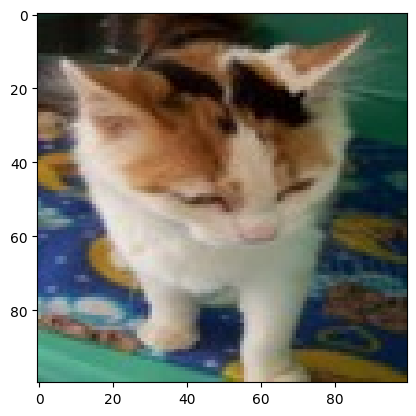

In [140]:
index = random.randint(0,len(y_test))
output = model.predict(X_test[index,:].reshape(1,100,100,3))
label = 'dog' if output<0.5 else 'cat'
print(f'Our model prediction is a {label}')
plt.imshow(X_test[index,:])